# E-Commerce Sales Analysis
**Author:** Yerzhigit Auyelbekov, Data Analyst  
**Date:** 18.02.2025

---

## 1. Introduction

This notebook presents a comprehensive data analysis project for an e-commerce dataset containing sales transactions over one year. The dataset includes information such as transaction numbers, dates, products, prices, quantities, customer numbers, and countries.

The objectives of this analysis are:

1. Understand sales trends over time.
2. Identify top-selling products.
3. Examine the number of products purchased per transaction.
4. Segment customers based on profitability.
5. Provide data-driven recommendations to improve business performance.

---

In [48]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Setting styles for plots
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (10, 5)

## 2. Data Loading and Inspection

Let's load the CSV file containing the e-commerce transactions and inspect the basic structure of the dataset.

In [49]:
# Loading the Dataset
file_path = "/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv"
df = pd.read_csv(file_path)

# Checking the basic information about the dataset
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
None


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [50]:
df.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany
536349,C536548,12/1/2018,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany


**Observations:**
- There are 8 columns: `TransactionNo`, `Date`, `ProductNo`, `ProductName`, `Price`, `Quantity`, `CustomerNo`, and `Country`.
- The dataset has over 500K rows.
- The `Date` column is not in datetime format yet.
- Some rows may have missing values in `CustomerNo`.
- Transactions with the letter "C" in `TransactionNo` might indicate cancellations.

---

## 3. Data Preprocessing

I will:
1. Convert the `Date` column to a proper datetime format.
2. Handle missing values in `CustomerNo`.
3. Separate cancellations from valid transactions.
4. Create a new column for total sales (revenue).

In [51]:
# Data Preprocessing

# 1. Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors="coerce")

# 2. Drop rows with missing CustomerNo (if we need to analyze by customer)
df.dropna(subset=["CustomerNo"], inplace=True)

# Convert CustomerNo to integer for easier handling
df["CustomerNo"] = df["CustomerNo"].astype(int)

# 3. Identify cancellations (TransactionNo starting with 'C')
df["Cancelled"] = df["TransactionNo"].astype(str).str.startswith("C")

# Create separate DataFrames for valid and cancelled transactions
df_valid = df[~df["Cancelled"]].copy()
df_cancellations = df[df["Cancelled"]].copy()

# 4. Create a new 'TotalSales' column
df_valid["TotalSales"] = df_valid["Price"] * df_valid["Quantity"]

# Remove the 'Cancelled' column from the valid DataFrame
df_valid.drop(columns=["Cancelled"], inplace=True)

# Inspect the cleaned dataset
df_valid.info()
df_valid.head()

<class 'pandas.core.frame.DataFrame'>
Index: 527764 entries, 0 to 536324
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527764 non-null  object        
 1   Date           527764 non-null  datetime64[ns]
 2   ProductNo      527764 non-null  object        
 3   ProductName    527764 non-null  object        
 4   Price          527764 non-null  float64       
 5   Quantity       527764 non-null  int64         
 6   CustomerNo     527764 non-null  int64         
 7   Country        527764 non-null  object        
 8   TotalSales     527764 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.3+ MB


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalSales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64


**Observations:**
- The dataset `df_valid` now contains only valid (non-canceled) transactions.
- There is a new column `TotalSales` representing the revenue for each line item.
- `CustomerNo` is now an integer, and `Date` is in datetime format.

---

## 4. Exploratory Data Analysis (EDA)

### 4.1 Basic Descriptive Statistics
Looking at basic descriptive statistics of numerical columns to understand the data's distribution.

In [59]:
# Basic Statistics
df_valid.describe()

,Date,Price,Quantity,CustomerNo,TotalSales
count,527764,527764.000000,527764.000000,527764.000000,5.277640e+05
mean,2019-07-04 05:58:58.445214208,12.629640,10.594679,15231.626733,1.193069e+02
min,2018-12-01 00:00:00,5.130000,1.000000,12004.000000,5.130000e+00
25%,2019-03-28 00:00:00,10.990000,1.000000,13813.000000,1.717000e+01
50%,2019-07-20 00:00:00,11.940000,3.000000,15159.000000,4.383000e+01
75%,2019-10-19 00:00:00,14.090000,11.000000,16729.000000,1.194000e+02
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000,1.002718e+06
std,NaN,7.933224,156.786795,1716.522182,1.851192e+03


### 4.2 Monthly Sales Trend

I will resample the data by month to observe how total sales fluctuate over time.

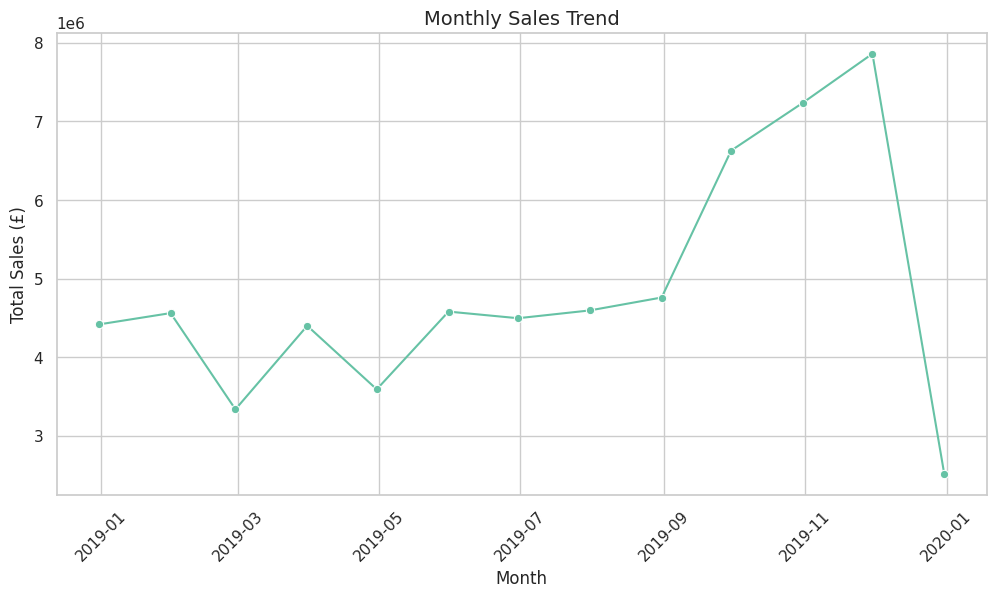

In [60]:
# Monthly Sales Trend

monthly_sales = df_valid.resample("ME", on="Date")["TotalSales"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (£)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Analysis:**

The graph illustrates monthly sales in pounds (£) for the year 2019. Key observations:
- Sales fluctuated in the first half of the year without a clear trend.
- A sharp increase occurred in the second half (September – December).
- December saw the highest sales (~£8M), followed by a steep drop in January 2020.
- Possible reasons: seasonal variations, promotions, end-of-year financial effects.

### 4.3 Top 10 Most Frequently Purchased Products
Let's see which products sell the most in terms of quantity.


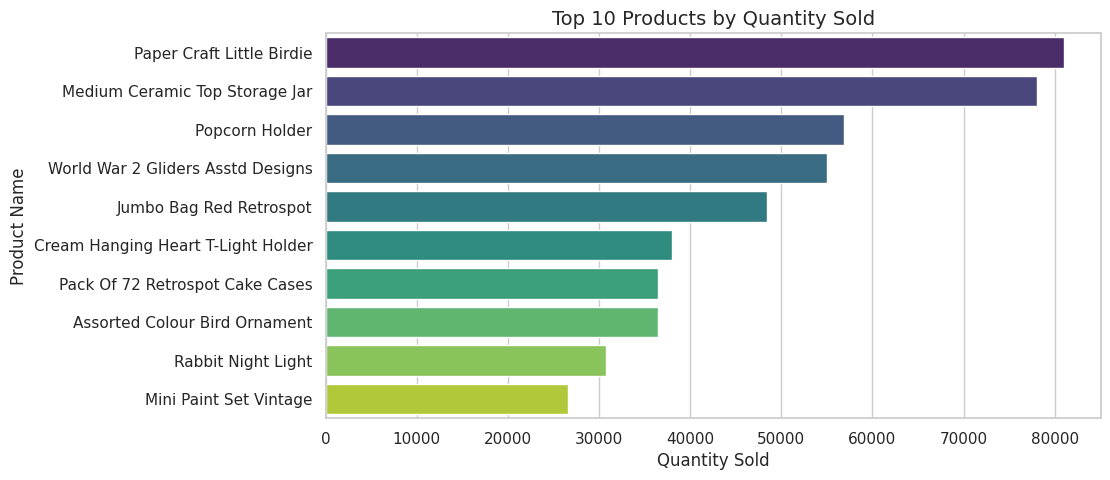

ProductName
Paper Craft Little Birdie             80995
Medium Ceramic Top Storage Jar        78033
Popcorn Holder                        56921
World War 2 Gliders Asstd Designs     55047
Jumbo Bag Red Retrospot               48478
Cream Hanging Heart T-Light Holder    37956
Pack Of 72 Retrospot Cake Cases       36515
Assorted Colour Bird Ornament         36493
Rabbit Night Light                    30788
Mini Paint Set Vintage                26633
Name: Quantity, dtype: int64

In [54]:
# Top 10 Products by Quantity

top_products_qty = (
    df_valid.groupby("ProductName")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette="viridis")
plt.title("Top 10 Products by Quantity Sold", fontsize=14)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()

top_products_qty

**Analysis:**
- These items are the top sellers by volume, which may differ from revenue-driven bestsellers.

### 4.4 Top 10 Products by Total Sales
Next, i will look at the top products in terms of overall revenue.


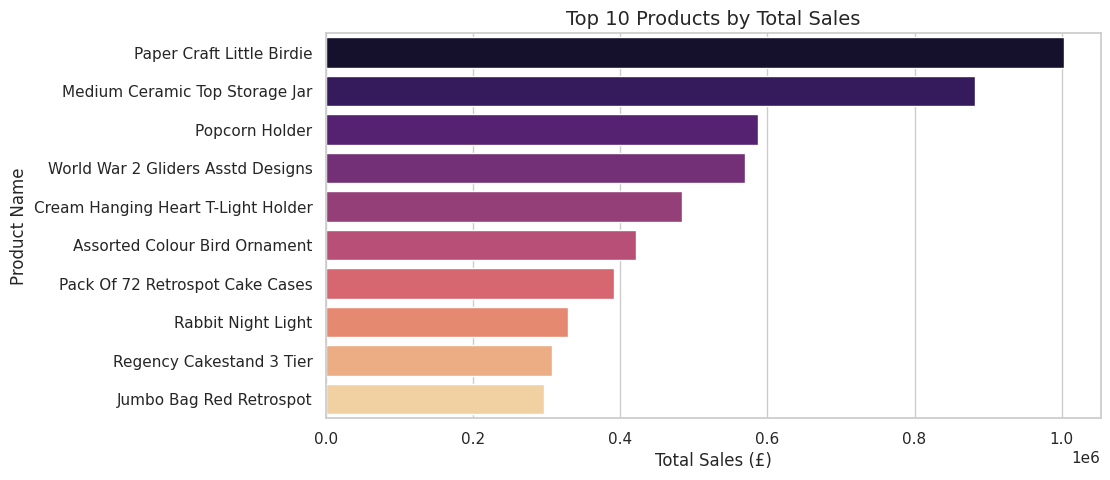

ProductName
Paper Craft Little Birdie             1002718.10
Medium Ceramic Top Storage Jar         881990.18
Popcorn Holder                         587433.94
World War 2 Gliders Asstd Designs      569735.39
Cream Hanging Heart T-Light Holder     484592.69
Assorted Colour Bird Ornament          421318.74
Pack Of 72 Retrospot Cake Cases        391485.03
Rabbit Night Light                     329029.89
Regency Cakestand 3 Tier               307483.85
Jumbo Bag Red Retrospot                297205.04
Name: TotalSales, dtype: float64

In [55]:
# Top 10 Products by Total Sales

top_products_sales = (
    df_valid.groupby("ProductName")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette="magma")
plt.title("Top 10 Products by Total Sales", fontsize=14)
plt.xlabel("Total Sales (£)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()

top_products_sales

**Analysis:**
- High-priced items may rank higher in revenue but lower in volume.

### 4.5 Number of Products per Transaction
Analyzing how many products are typically purchased in a single transaction.

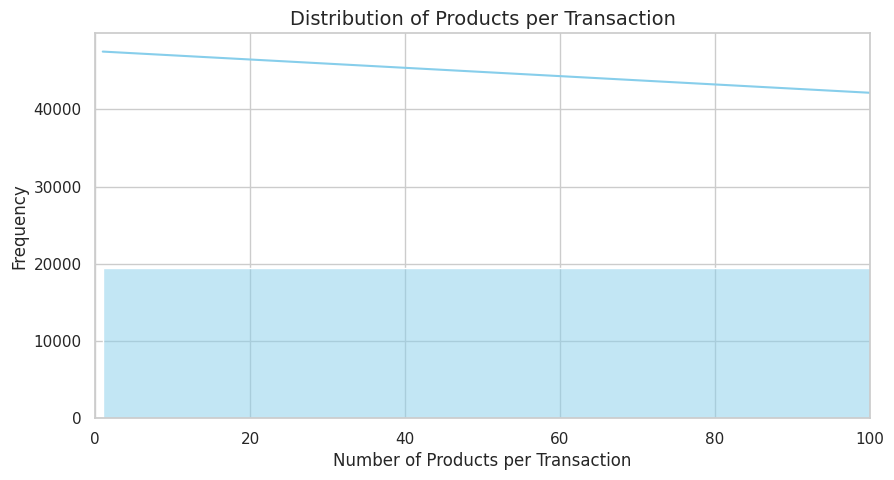

In [56]:
# Products per Transaction

products_per_transaction = df_valid.groupby("TransactionNo")["Quantity"].sum()

plt.figure(figsize=(10, 5))
sns.histplot(products_per_transaction, bins=50, kde=True, color="skyblue")
plt.title("Distribution of Products per Transaction", fontsize=14)
plt.xlabel("Number of Products per Transaction", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, 100)
plt.show()


**Analysis:**
- Most transactions involve relatively few items, though there are outliers where customers buy in bulk.

### 4.6 Customer Segmentation by Revenue
A simple approach is to group customers into three segments (High, Medium, Low) based on total revenue.

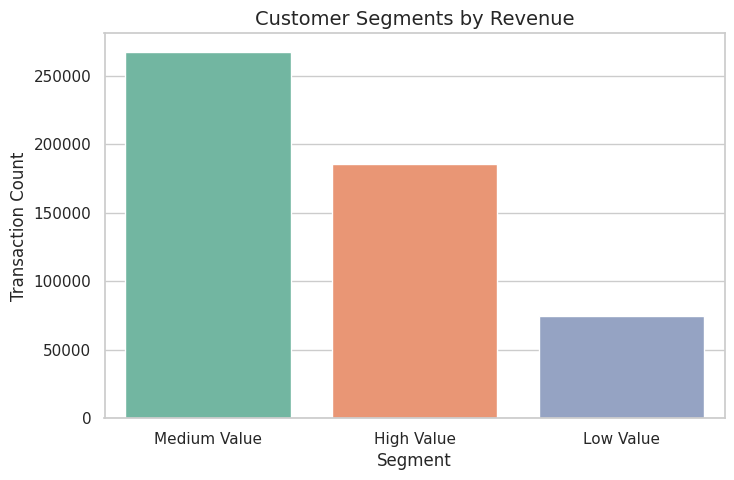

CustomerSegment
Medium Value    267604
High Value      185346
Low Value        74814
Name: count, dtype: int64

In [57]:
# Customer Segmentation

customer_revenue = df_valid.groupby("CustomerNo")["TotalSales"].sum()

# Define percentiles for segmentation
high_value_threshold = customer_revenue.quantile(0.90)  # Top 10% revenue
medium_value_threshold = customer_revenue.quantile(0.50)  # Median

def segment_customer(revenue):
    if revenue >= high_value_threshold:
        return "High Value"
    elif revenue >= medium_value_threshold:
        return "Medium Value"
    else:
        return "Low Value"

# Map each customer to a segment
customer_segment_map = customer_revenue.apply(segment_customer)
df_valid["CustomerSegment"] = df_valid["CustomerNo"].map(customer_segment_map)

segment_counts = df_valid["CustomerSegment"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title("Customer Segments by Revenue", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)
plt.show()

segment_counts

**Analysis:**
- The **High Value** segment is typically a small proportion of customers but generates a significant share of revenue.
- **Low Value** customers are numerous but less individually profitable.

### 4.7 Geographic Analysis (Top 10 Countries)

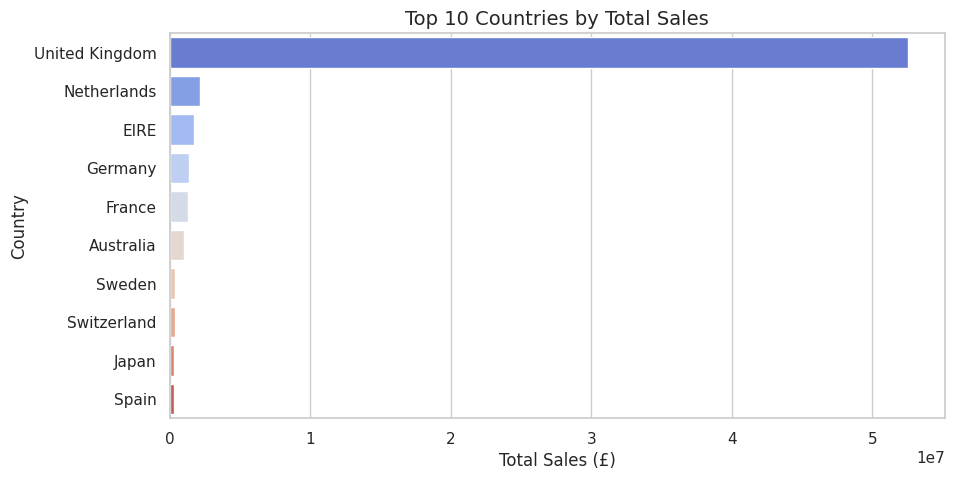

Country
United Kingdom    52524576.47
Netherlands        2151553.59
EIRE               1713410.95
Germany            1371543.27
France             1330652.89
Australia           995607.91
Sweden              401879.89
Switzerland         361969.25
Japan               293155.44
Spain               281012.27
Name: TotalSales, dtype: float64

In [58]:
# Top 10 Countries by Total Sales

country_sales = df_valid.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)
top_countries = country_sales.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries by Total Sales", fontsize=14)
plt.xlabel("Total Sales (£)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

top_countries

**Analysis:**
- Often, the UK dominates the sales for a UK-based e-commerce store.
- Other top countries may present growth opportunities.

---

## 5. Conclusions and Recommendations

1. **Sales Trend**  
   - Sales vary throughout the year, with peaks likely during holiday seasons.  
   - **Recommendation**: Align marketing and stock levels with seasonal peaks.

2. **Top-Selling Products**  
   - A few products drive a large portion of sales volume and revenue.  
   - **Recommendation**: Keep these items in stock consistently and promote them.

3. **Bulk vs. Small Purchases**  
   - Most transactions involve a small number of items; however, there are notable bulk purchases.  
   - **Recommendation**: Offer bundle deals and volume discounts to incentivize larger orders.

4. **Customer Segmentation**  
   - A small percentage of **High Value** customers contribute disproportionately to revenue.  
   - **Recommendation**: Implement loyalty programs and personalized marketing to retain and reward these top spenders. Encourage **Low Value** customers to increase their basket size with targeted promotions.

5. **Geographical Insights**  
   - The UK is the primary market, but certain international markets also show promise.  
   - **Recommendation**: Consider region-specific promotions and localized marketing strategies for top international countries.

By focusing on high-value customers, ensuring top products remain in stock, and planning promotions around peak seasons, the business can maximize revenue and customer satisfaction.